In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
train_data = pd.read_csv('Data_Set/titanic/train.csv')
test_data = pd.read_csv('Data_Set/titanic/test.csv')

In [113]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [114]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
def pie_chart(feature):
    feature_value = train_data[feature].value_counts(sort = False)
    feature_size = feature_value.size
    feature_index = feature_value.index
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect = 'auto')
    plt.pie(feature_value, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + ' percentage')
    plt.show()
    
    for index, value in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, index + 1,aspect = 'equal')
        plt.pie([survived[value], dead[value]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(value) + '\'s Survived')
    
    plt.show()

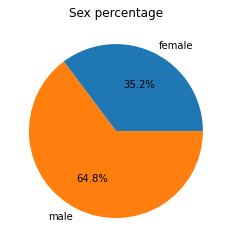

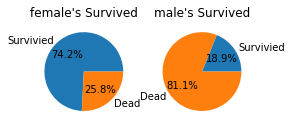

In [117]:
pie_chart('Sex')

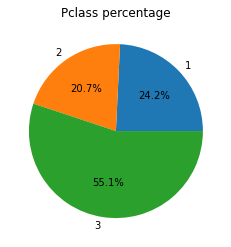

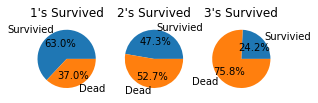

In [118]:
pie_chart('Pclass')

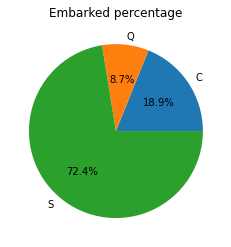

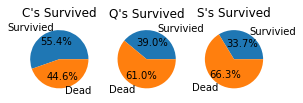

In [119]:
pie_chart('Embarked')

In [120]:
def bar_chart(feature):
    survived = train_data[train_data['Survived'] == 1][feature].value_counts()
    dead = train_data[train_data['Survived'] == 0][feature].value_counts()
    
    temp_df = pd.DataFrame([survived,dead])
    temp_df.index = ['survived', 'dead']
    temp_df.plot(kind = 'bar', stacked = True, figsize = (20,10))

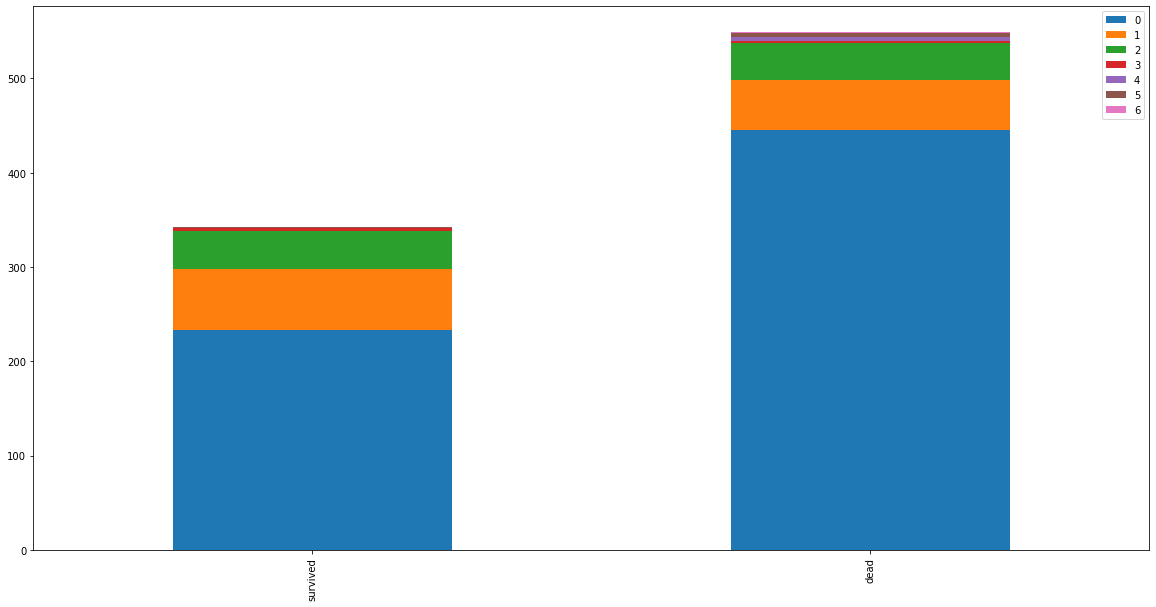

In [121]:
bar_chart('Parch')

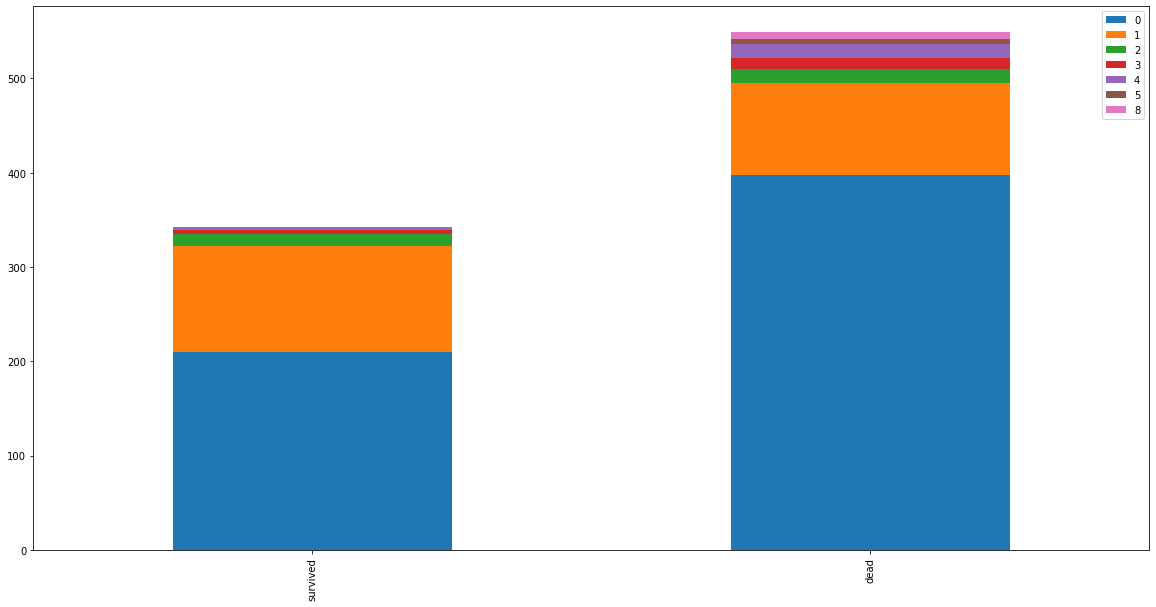

In [122]:
bar_chart('SibSp')

In [123]:
# bar_chart('Age')

#### ([A-Za-z]+)\\. : 전체 알파벳 중에서 공백으로 시작하고, .으로 끝나는 경우

[A-Za-z] : 전체 알파벳 문자
+ : 의미를 더할 때 쓰는 기호
\ : 공백
. : 점 그 자체

In [124]:
#전처리
data = [train_data, test_data]
for dataset in data:
    dataset['title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
    
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [125]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [126]:
pd.crosstab(train_data['title'],train_data['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [127]:
#비슷한 데이터들끼리 뭉쳐주기
for dataset in data:
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace(['Capt', 'Col', 'Countess', 'Don',
                                                 'Dona','Dr','Jonkheer','Lady',
                                                 'Major','Rev','Sir'], 'etc')
    dataset['title'] = dataset['title'].astype(str)

In [128]:
# pd.crosstab(test_data['title'],test_data['Sex'])

In [129]:
# pd.crosstab(train_data['title'],train_data['Sex'])

In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [131]:
#embarked 데이터 전처리
train_data.Embarked.value_counts(dropna= False)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [132]:
train_data.Embarked.value_counts(dropna= False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
#age 전처리 / 카테고리형 변수로 바꿀지말지 고민하기
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(int(train_data['Age'].mean()))

In [134]:
dataset['Age'].value_counts()


29.0    96
24.0    17
21.0    17
22.0    16
30.0    15
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [135]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [136]:
#Fare 전처리(카테고리형 변수 전환하는 것을 고려)
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [137]:
train_data[['Pclass', 'Fare']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [138]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(13.67)

In [139]:
#sibsp, parch 전처리
for dataset in data:
    dataset['family'] = dataset['SibSp'] + dataset['Parch']

In [140]:
#필요없는 데이터들을 drop (for문 안되는걸로!)
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train_data = train_data.drop(drop_list, axis = 1)
test_data = test_data.drop(drop_list, axis = 1)

In [141]:
#train 데이터에서 정답지를 분리
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)


train_label = train_data['Survived']
train_data = train_data.drop('Survived', axis = 1)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [143]:
train_data, train_label = shuffle(train_data, train_label)

In [159]:
def get_model(model):#모델 객체 선언
    model.fit(train_data, train_label) # 데이터를 학습
    pred = model.predict(test_data)
    acc = model.score(train_data,train_label)
    print(round(acc,4))
#     return pred

In [160]:
get_model(LogisticRegression())
get_model(SVC())
get_model(KNeighborsClassifier())
get_model(RandomForestClassifier())
get_model(GaussianNB())

C:\Users\sparkle\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8272
0.6824
0.8227
0.9787
0.7935
